In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image

In [20]:
def Neighborhood_Conditional_Histogramm(image_hist, image,
                                        neighborhood_radius=2, threshold=10):
    
    neighborhood_hist = np.zeros(len(image_hist))
    image_hight = image.shape[0]
    image_widht = image.shape[1]
        
    for A in range(image_hight):  
        for B in range(image_widht):
            gray_layer = image[A, B]
            for i in range(-neighborhood_radius, neighborhood_radius + 1, 1): 
                for j in range(-neighborhood_radius, neighborhood_radius + 1, 1):
                    if  (0 <= A+i < image_hight) and (0 <= B+j < image_widht):
                        neighborhood_hist[gray_layer] += abs(int(gray_layer) - int(image[A+i, B+j]))>=threshold
                                
    neighborhood_hist *= 1.0 / ((2.0*neighborhood_radius + 1.0)*(2.0*neighborhood_radius + 1.0) - 1.0)   
        
    return neighborhood_hist

In [45]:
def Global_Conditional_Histogramm(neighborhood_hist, R, N):
    enhanced_hist = np.zeros(len(neighborhood_hist))
    enhanced_hist[0] = neighborhood_hist[0]
    
    for gray_layer in range(1, len(neighborhood_hist)):
        enhanced_hist[gray_layer] = enhanced_hist[gray_layer-1] + neighborhood_hist[gray_layer]
        
    enhanced_hist *= (R-1) / N
    
    return enhanced_hist

In [38]:
def Enhanced_Image(image, enhanced_hist):
    enh_image = np.copy(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            enh_image[i, j] = enhanced_hist[image[i, j]]
            
    return enh_image

In [39]:
my_image = Image.open('image2.png')
R = np.array(my_image)[0, 0, 3] + 1
image = np.array(my_image)[:, :, 0]
image_hist = np.histogram(image, bins=range(R+1))[0]

In [40]:
nbc_hist = Neighborhood_Conditional_Histogramm(image_hist, image)

Text(0.5, 1.0, 'Enhanced conditional histogramm')

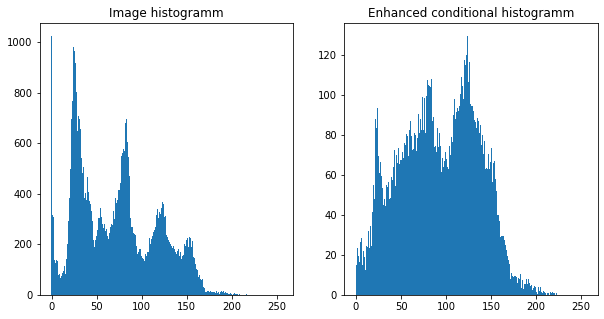

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(range(256), image_hist, width=1)
axs[0].set_title("Image histogramm")
axs[1].bar(range(256), nbc_hist, width=1)
axs[1].set_title("Enhanced conditional histogramm")

In [46]:
gch = Global_Conditional_Histogramm(nbc_hist, 256, image.size)

In [47]:
en_im = Enhanced_Image(image, gch)

Text(0.5, 1.0, 'Enhanced result based on neighborhood conditional histogramm')

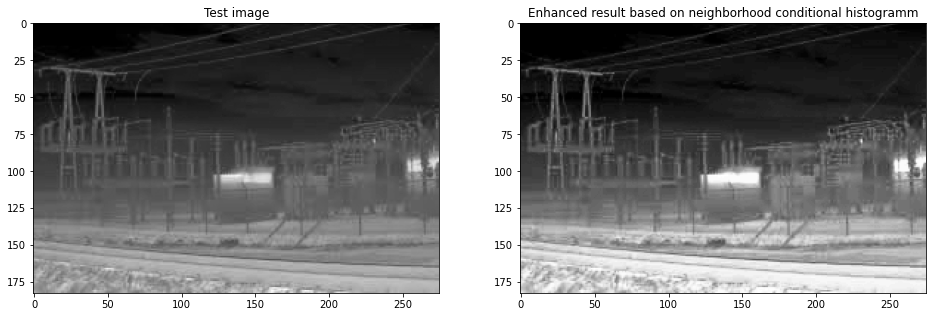

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Test image")
axs[1].imshow(en_im, cmap='gray')
axs[1].set_title("Enhanced result based on neighborhood conditional histogramm")